 Q1. a) Are all the values in the data reasonable? Are there missing values?
(using matplotlib to plot the distribution according to each column， and initially check the distribution of the whole data)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'C:\\Users\\hzhou\\Desktop\\Acumen,LLC'

In [8]:
data = pd.read_excel('Acumen_Data_Analysis_Exercise.xlsx',sheet_name='Data' )
data.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27.31931,0,36906.57,3.695037
1,2,2,1,0.0,3.0,27.81931,0,37906.57,4.978868
2,3,3,1,0.0,3.0,28.06931,0,38906.57,4.007956
3,4,4,1,0.0,3.0,28.31931,0,39906.57,2.337157
4,5,5,1,0.0,3.0,28.56931,0,40906.57,2.112604


In [3]:
print(data.keys()) 

Index(['Observation Number', 'Quarter', 'Employee Id', 'Sex (Male=1)', 'Race',
       'Age', 'Hospital Visit This Quarter (1=Yes)', 'Salary', 'Health Score'],
      dtype='object')


In [8]:
# check the data if they are reasonable. 
# The same employeeId should have the same sex and race, while the age should either stay same or getting older according to the quaters. See below code which made sure that same employeeId has same sex & race

In [9]:
for column in data:
    n_missing = data[column].isnull().sum()
    if n_missing > 0:
        print('number of missing values in column', column, 'is', n_missing)

number of missing values in column Sex (Male=1) is 71
number of missing values in column Race is 2123


In [11]:
data.groupby('Employee Id')[['Race', 'Sex (Male=1)']].nunique().reset_index().head()

,Employee Id,Race,Sex (Male=1)
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


#b) What are the characteristics of employees at Company A? Do these demographics change over time?

In [11]:
data.groupby('Quarter')['Sex (Male=1)'].value_counts().unstack()

Sex (Male=1),0.0,1.0
Quarter,,
1,351,331
2,454,434
3,569,565
4,715,727
5,821,844
6,866,902
7,898,945
8,917,961
9,936,971


Text(0.5, 1.0, 'Sex vs Quarter')

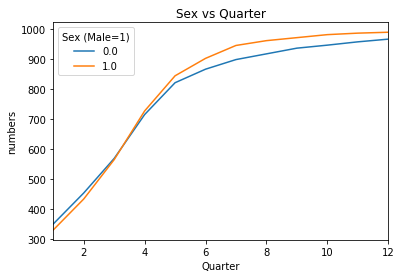

In [12]:
data.groupby('Quarter')['Sex (Male=1)'].value_counts().unstack().plot(kind='line')
plt.ylabel('numbers')
plt.title('Sex vs Quarter')

In [13]:
data.groupby('Quarter')['Race'].value_counts().unstack()

Race,1.0,2.0,3.0
Quarter,,,
1,337,167,98
2,433,222,131
3,563,294,157
4,721,381,190
5,826,438,226
6,880,461,240
7,913,478,253
8,931,487,257
9,947,493,260


Text(0.5, 1.0, 'Race vs Quarter')

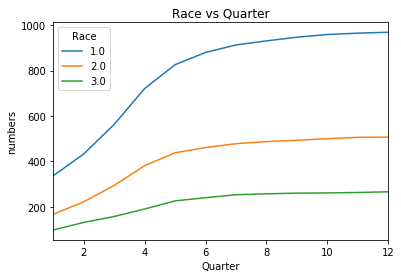

In [14]:
data.groupby('Quarter')['Race'].value_counts().unstack().plot(kind='line')
plt.ylabel('numbers')
plt.title('Race vs Quarter')

In [15]:
data.groupby('Quarter')['Hospital Visit This Quarter (1=Yes)'].value_counts().unstack()

Hospital Visit This Quarter (1=Yes),0,1
Quarter,,
1,633,51
2,814,77
3,1030,109
4,1299,149
5,1500,171
6,1596,179
7,1660,190
8,1693,192
9,1683,231


Text(0.5, 1.0, 'Hospital_Visit vs Quater')

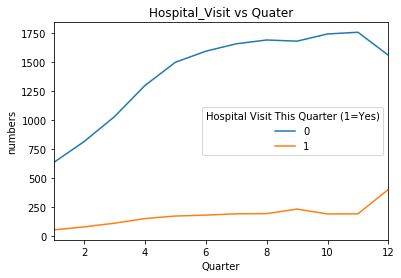

In [16]:
data.groupby('Quarter')['Hospital Visit This Quarter (1=Yes)'].value_counts().unstack().plot(kind='line')
plt.ylabel('numbers')
plt.title('Hospital_Visit vs Quater')

In [17]:
df = data.dropna(axis = 0)
df.head()
# Delete the rows of missing values (sex, race), there are 16927 rows (observations) left

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27.31931,0,36906.57,3.695037
1,2,2,1,0.0,3.0,27.81931,0,37906.57,4.978868
2,3,3,1,0.0,3.0,28.06931,0,38906.57,4.007956
3,4,4,1,0.0,3.0,28.31931,0,39906.57,2.337157
4,5,5,1,0.0,3.0,28.56931,0,40906.57,2.112604


In [18]:
# average for salary according to every quarter
df.groupby('Quarter')['Salary'].mean()

Quarter
1     43788.526783
2     44383.833418
3     45138.384317
4     45628.329355
5     46250.401152
6     47060.679575
7     47919.308621
8     48808.722856
9     49697.859086
10    50623.592845
11    51560.722660
12    52516.347732
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Mean_salary vs Quarter')

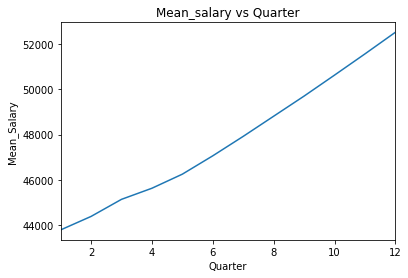

In [19]:
df.groupby('Quarter')['Salary'].mean().plot(kind='line')
plt.ylabel('Mean_Salary')
plt.title('Mean_salary vs Quarter')

In [20]:
df.groupby('Quarter')['Age'].median()

Quarter
1     26.643205
2     26.551455
3     26.771890
4     27.140400
5     27.566030
6     28.103110
7     28.516630
8     28.907020
9     29.272870
10    29.608690
11    29.913520
12    30.204410
Name: Age, dtype: float64

Text(0.5, 1.0, 'Median_age vs Quarter')

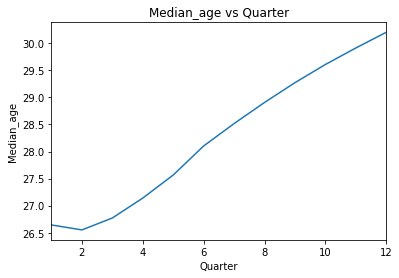

In [21]:
df.groupby('Quarter')['Age'].median().plot(kind='line')
plt.ylabel('Median_age')
plt.title('Median_age vs Quarter')

In [22]:
# Q2 a) Which characteristics are associated with the health score? 
# Use tables and charts (suggestion: scatter plots for continuous variables) to determine which characteristics are associated with the health score.

In [23]:
#For health scores, there are 1238 records (6.48%) show 10, which is unreasonable since the maximum score is only 6. I decided to delete these rows.
#In addition, I delete the rows with unreasonable age, as well as missing values. There are 15878 rows left


In [24]:
data= data[~data['Health Score'].isin([10])]
data= data[data['Age'] < 100]
data= data[data['Age'] > 15]
data1 =data.dropna(axis = 0)
data1.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27.31931,0,36906.57,3.695037
1,2,2,1,0.0,3.0,27.81931,0,37906.57,4.978868
2,3,3,1,0.0,3.0,28.06931,0,38906.57,4.007956
3,4,4,1,0.0,3.0,28.31931,0,39906.57,2.337157
4,5,5,1,0.0,3.0,28.56931,0,40906.57,2.112604


In [25]:
data1.groupby('Quarter')['Health Score'].mean()

Quarter
1     2.957220
2     3.062881
3     3.053617
4     3.082009
5     3.080370
6     3.121949
7     3.192630
8     3.135304
9     3.177808
10    3.147629
11    3.234287
12    3.298995
Name: Health Score, dtype: float64

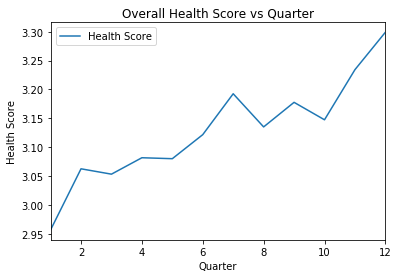

In [26]:
data1.groupby('Quarter')['Health Score'].mean().plot(kind='line')
plt.ylabel('Health Score') 
plt.title('Overall Health Score vs Quarter') #it has the tendency to increase
plt.legend(loc = 'upper left')

In [27]:
#sex related with health score?

In [28]:
x = list(range(1,13))
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [29]:
male = data1[data1['Sex (Male=1)'] == 1]
y1 = male.groupby('Quarter')['Health Score'].mean()
female = data1[data1['Sex (Male=1)'] == 0]
y0 = female.groupby('Quarter')['Health Score'].mean()

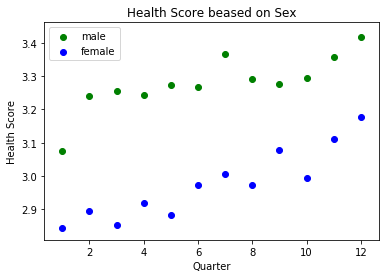

In [30]:
plt.scatter(x,y1, color= 'g', label='male')
plt.scatter(x,y0, color= 'b', label='female')
plt.xlabel('Quarter')
plt.ylabel('Health Score')
plt.title('Health Score beased on Sex')
plt.legend(loc = 'upper left')

In [31]:
#Salary related to HS?

In [32]:
Salary_low= data1[data1['Salary'] < data1['Salary'].quantile(0.25)]
S1 = Salary_low.groupby('Quarter')['Health Score'].mean()

Salary_medium= data1[(data1['Salary'] > data1['Salary'].quantile(0.25)) & (data1['Salary'] < data1['Salary'].quantile(0.5)) ]
S2 = Salary_medium.groupby('Quarter')['Health Score'].mean()

Salary_high= data1[(data1['Salary'] > data1['Salary'].quantile(0.5)) & (data1['Salary'] < data1['Salary'].quantile(0.75)) ]
S3 = Salary_high.groupby('Quarter')['Health Score'].mean()

Salary_fancy= data1[data1['Salary'] > data1['Salary'].quantile(0.75)]
S4 = Salary_fancy.groupby('Quarter')['Health Score'].mean()

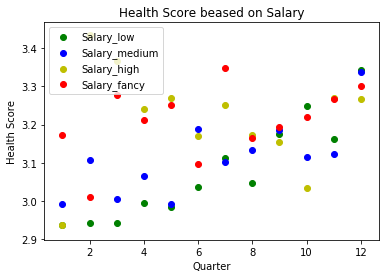

In [33]:
plt.scatter(x,S1, color= 'g', label='Salary_low')
plt.scatter(x,S2, color= 'b', label='Salary_medium')
plt.scatter(x,S3, color= 'y', label='Salary_high')
plt.scatter(x,S4, color= 'r', label='Salary_fancy')

plt.xlabel('Quarter')
plt.ylabel('Health Score')
plt.title('Health Score beased on Salary')
plt.legend(loc = 'upper left')

In [34]:
# race associated with HS?

In [35]:
Race1 = data1[data1['Race'] == 1]
R1 = Race1.groupby('Quarter')['Health Score'].mean()
Race2 = data1[data1['Race'] == 2]
R2 = Race2.groupby('Quarter')['Health Score'].mean()
Race3 = data1[data1['Race'] == 3]
R3 = Race3.groupby('Quarter')['Health Score'].mean()

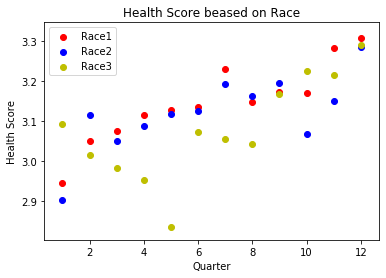

In [36]:
plt.scatter(x,R1, color= 'r', label='Race1')
plt.scatter(x,R2, color= 'b', label='Race2')
plt.scatter(x,R3, color= 'y', label='Race3')

plt.xlabel('Quarter')
plt.ylabel('Health Score')
plt.title('Health Score beased on Race')
plt.legend(loc = 'upper left')

In [37]:
#age associated with HS?

In [38]:
teen= data1[data1['Age'] <= 20]
teen.groupby('Quarter')['Health Score'].mean()

Quarter
1     3.054889
2     2.120430
3     4.521749
4     4.099044
5     1.866395
6     3.149277
7     3.054377
8     4.408543
9     3.900422
10    2.321493
11    4.039900
12    3.275846
Name: Health Score, dtype: float64

In [39]:
adult=data1[(data1['Age'] <= 40) & (data1['Age'] >20)]
adult.groupby('Quarter')['Health Score'].mean()

Quarter
1     2.898694
2     3.015182
3     3.007962
4     3.027791
5     3.029707
6     3.063138
7     3.129200
8     3.064211
9     3.109855
10    3.069779
11    3.141554
12    3.212226
Name: Health Score, dtype: float64

In [40]:
midaged=data1[(data1['Age'] <= 60) & (data1['Age'] >40)]
midaged.groupby('Quarter')['Health Score'].mean()

Quarter
1     3.580683
2     3.708426
3     3.643565
4     3.820893
5     3.762125
6     3.842567
7     3.900360
8     3.838635
9     3.764866
10    3.808963
11    3.890727
12    3.912542
Name: Health Score, dtype: float64

In [41]:
old=data1[data1['Age'] >60]
old.groupby('Quarter')['Health Score'].mean()

Quarter
4     5.230286
5     3.876224
6     5.091189
7     2.823402
8     2.753541
9     2.059871
10    2.453787
11    4.419088
12    3.692762
Name: Health Score, dtype: float64

In [42]:
x2=list(range(4,13))
x2

[4, 5, 6, 7, 8, 9, 10, 11, 12]

In [43]:
teen= data1[data1['Age'] <= 20]
A1 = teen.groupby('Quarter')['Health Score'].mean()
adult=data1[(data1['Age'] <= 40) & (data1['Age'] >20)]
A2 = adult.groupby('Quarter')['Health Score'].mean()
midaged=data1[(data1['Age'] <= 60) & (data1['Age'] >40)]
A3 = midaged.groupby('Quarter')['Health Score'].mean()
old=data1[data1['Age'] >60]
A4 = old.groupby('Quarter')['Health Score'].mean()

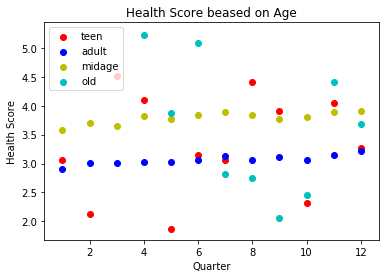

In [44]:
plt.scatter(x,A1, color= 'r', label='teen')
plt.scatter(x,A2, color= 'b', label='adult')
plt.scatter(x,A3, color= 'y', label='midage')
plt.scatter(x2,A4, color= 'c', label='old')

plt.xlabel('Quarter')
plt.ylabel('Health Score')
plt.title('Health Score beased on Age')
plt.legend(loc = 'upper left')

In [45]:
visit0 = data1[data1['Hospital Visit This Quarter (1=Yes)'] == 0]
V0 = visit0.groupby('Quarter')['Health Score'].mean()
visit1 = data1[data1['Hospital Visit This Quarter (1=Yes)'] == 1]
V1 = visit1.groupby('Quarter')['Health Score'].mean()

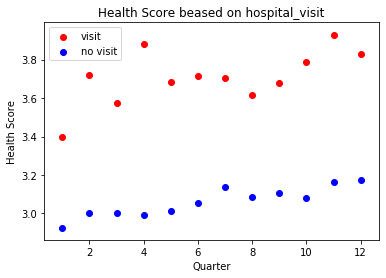

In [50]:
plt.scatter(x,V1, color= 'r', label='visit')
plt.scatter(x,V0, color= 'b', label='no visit')

plt.xlabel('Quarter')
plt.ylabel('Health Score')
plt.title('Health Score beased on hospital_visit')
plt.legend(loc = 'upper left')

In [48]:
data1[data1['Hospital Visit This Quarter (1=Yes)'] == 0]
visit0.groupby('Quarter')['Health Score'].mean()

Quarter
1     2.922754
2     3.001662
3     2.999667
4     2.992141
5     3.013621
6     3.054979
7     3.136870
8     3.082865
9     3.107098
10    3.081396
11    3.164345
12    3.171862
Name: Health Score, dtype: float64

In [49]:
visit1 = data1[data1['Hospital Visit This Quarter (1=Yes)'] == 1]
visit1.groupby('Quarter')['Health Score'].mean()

Quarter
1     3.395191
2     3.717826
3     3.576758
4     3.880594
5     3.682057
6     3.712266
7     3.705115
8     3.615775
9     3.679669
10    3.785834
11    3.928536
12    3.830157
Name: Health Score, dtype: float64